<a href="https://colab.research.google.com/github/Quantum-Intelligence-Frontier/dldna/blob/main/notebooks/zh/part_1/07_卷积神经网络的进化.ipynb" target="_parent">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="在 Colab 中打开"/>
</a>

# 7 卷积神经网络(CNN)的进化

> "有时，最简单的想法会带来最大的创新。" - 威廉·奥卡姆 (William of Ockham)，哲学家

卷积神经网络(Convolutional Neural Network, CNN)在1989年通过扬·勒坤(Yann LeCun)使用反向传播算法进行可学习的卷积滤波器研究，以及1998年LeNet-5成功实现手写数字识别中展示了其可能性。2012年，AlexNet在ImageNet大规模视觉识别挑战赛 (ILSVRC) 中以压倒性的性能夺冠，开启了深度学习尤其是CNN的时代。然而，在AlexNet之后，尝试增加网络深度时遇到了梯度消失/爆炸(vanishing/exploding gradients)问题的困扰。

2015年，微软研究团队的何凯明等人提出的ResNet(残差网络)通过“残差学习(residual learning)”这一革命性想法解决了这个问题。ResNet成功地训练了之前无法实现的152层深度网络，并在图像识别领域树立了新的标杆。ResNet的核心元素——残差连接(residual connection)，已成为当今大多数深度学习架构中的关键组成部分。

本章将回顾CNN诞生的背景及其发展历程，深入分析ResNet的核心思想、结构和实现方法。此外，还将探讨在CNN发展中具有重要意义的里程碑——Inception模块和EfficientNet的关键概念，以便全面理解现代CNN架构的进化过程。

## 7.1 卷积神经网络的诞生

> **挑战任务:** 如何让计算机像人类一样识别图像中的对象？
>
> **研究者的苦恼:** 初期计算机视觉研究人员试图寻找一种方法来提取图像内的特征(feature)，并基于这些特征进行对象识别，而不是简单地将图像视为像素值的集合。然而，哪些特征是重要的以及如何高效地提取这些特征并不明确。

20世纪60年代初，David Hubel和Torsten Wiesel通过实验发现猫的视觉皮层中某些神经元仅对特定的视觉模式（如垂直线、水平线、特定方向的边界）有选择性反应。他们因这项研究在1981年获得了诺贝尔生理学或医学奖，但当时没有人预料到这一发现将为人工智能领域带来革命性的进展。Hubel和Wiesel的发现成为了现代CNN两大核心概念*卷积层(convolutional layer)* 和 *池化层(pooling layer)* 的生物学基础。

*   **简单细胞 (Simple cells):** 对特定方向的边缘(edge)或线段等局部特征有反应。这类似于CNN使用滤波器(核)从图像中提取局部特征的方式。
*   **复杂细胞 (Complex cells):** 具有对简单细胞输出的位置不变性(translation invariance)。也就是说，无论特定模式在图像的哪个位置出现，都会产生反应。这与CNN通过池化层减少特征图大小的同时保持一定程度的位置信息的方式相似。
1980年，福岛邦彦（Kunihiko Fukushima）基于这些概念提出了可称为CNN原型的Neocognitron。Neocognitron由多层S-cell（简单细胞）和C-cell（复杂细胞）组成，能够提取图像的层次特征，并执行对位置变化稳健的模式识别。

然而，当时的Neocognitron没有确立学习算法，因此必须手动设置滤波器（权重）。1989年，杨立昆（Yann LeCun）将反向传播（backpropagation）算法应用于卷积神经网络，使得可以从数据中自动学习滤波器。由此，现代CNN诞生，并在手写数字识别方面表现出色，命名为LeNet-5。

2012年，AlexNet凭借在ImageNet挑战赛中的卓越表现赢得了冠军，开启了深度学习尤其是CNN的时代。AlexNet比LeNet-5具有更深更复杂的结构，并通过利用GPU进行并行计算，能够高效地从大规模数据集（ImageNet）中学习。

### 7.1.1 数字信号处理的发展与CNN的背景

为了深入理解计算机视觉和CNN，有必要考察数字信号处理（Digital Signal Processing, DSP）领域的发展过程。1807年，约瑟夫·傅里叶（Joseph Fourier）提出了傅里叶变换（Fourier Transform），即所有周期函数都可以分解为正弦（sin）函数和余弦（cos）函数的和。这成为了信号处理领域的基石，使得可以将时间域（time domain）中的信号转换到频率域（frequency domain）进行分析。

特别是20世纪60年代随着数字计算机的发展，快速傅里叶变换（Fast Fourier Transform, FFT）算法被开发出来，数字信号处理迎来了新的转折点。FFT大大加快了傅里叶变换的计算速度，并开始在图像、语音、通信等多个领域广泛使用信号处理技术。

在图像处理中，卷积运算起着核心作用。卷积是通过将滤波器（内核）应用于输入信号（图像），以提取所需特征或去除噪声的基本运算。从20世纪60年代发展起来的数字滤波理论使得边界检测（edge detection）、模糊化（blurring）、锐化（sharpening）等多种处理成为可能。20世纪60年代末，卡尔曼滤波器（Kalman Filter）出现，为从包含噪声的测量值中估计系统状态提供了强大的工具。卡尔曼滤波器使用基于贝叶斯定理（Bayes' theorem）的递归算法，在今天的计算机视觉目标跟踪（object tracking）、机器人视觉等领域中是必不可少的。

这些传统的数字信号处理技术构成了CNN的理论基础。然而，现有的滤波器需要人工设计，并且具有固定形式，因此在识别多种模式方面存在局限性。通过克服这些限制并能够从数据中自动学习最优滤波器，CNN为图像识别领域带来了革命性的变化。

### 7.1.2 数字滤波与卷积

为了理解CNN，首先需要了解数字滤波的概念。数字滤波在信号处理中有两个主要用途。
1. **信号分离 (Signal Separation):** 从混合信号中分离出所需的信号成分。 (例: 胎儿的心跳和母亲的心跳混合在一起时，只分离出胎儿的心跳)
2. **信号复原 (Signal Restoration):** 将失真或损坏的信号恢复到接近原始信号的状态。 (例: 图像去噪、模糊图像恢复)

最基本的数字滤波器之一是Sobel滤波器。Sobel滤波器是一个3x3大小的矩阵，用于检测图像的边缘(edge)。

In [ ]:
!pip install dldna[colab] # in Colab
# !pip install dldna[all] # in your local

%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np
# Sobel filter for vertical edge detection
sobel_vertical = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Sobel filter for horizontal edge detection
sobel_horizontal = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

首先，我们来看一下经典数字滤波器的作用。整个代码在 chapter_06/filter_utils.py 中。

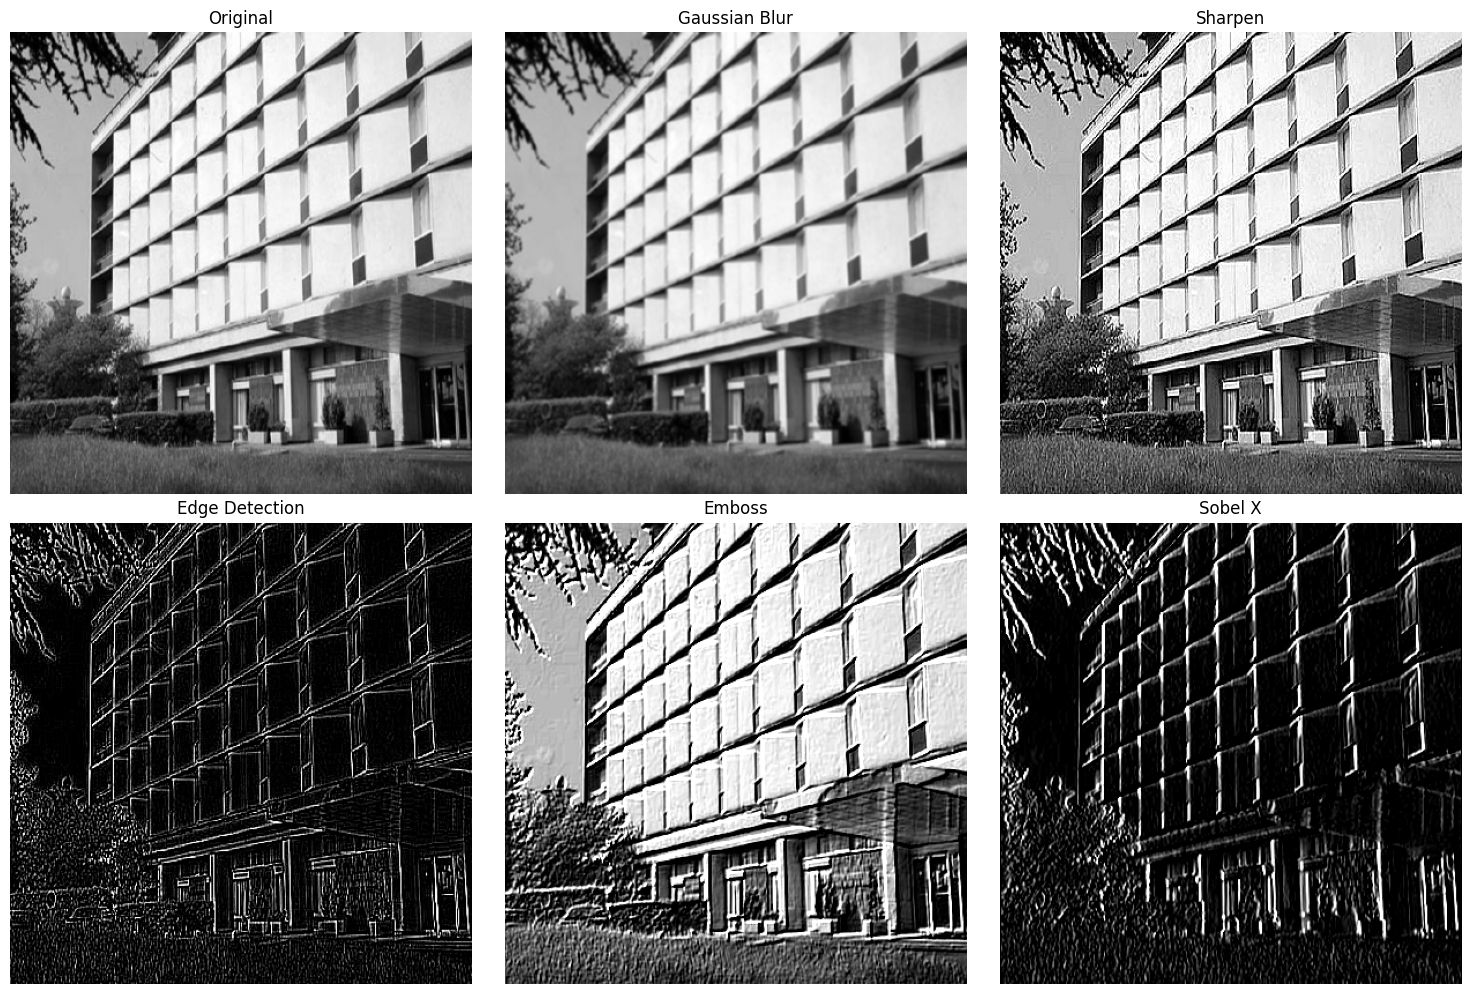

In [3]:
import matplotlib.pyplot as plt
from dldna.chapter_07.filter_utils import show_filter_effects, create_convolution_animation
%matplotlib inline

# 테스트용 이미지 URL
IMAGE_URL = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/building.jpg"

# 필터 효과 시각화
show_filter_effects(IMAGE_URL)

上述示例使用了以下滤镜。

In [ ]:
filters = {
    'Gaussian Blur': cv2.getGaussianKernel(3, 1) @ cv2.getGaussianKernel(3, 1).T,
    'Sharpen': np.array([
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0]
    ]),
    'Edge Detection': np.array([
        [-1, -1, -1],
        [-1, 8, -1],
        [-1, -1, -1]
    ]),
    'Emboss': np.array([
        [-2, -1, 0],
        [-1, 1, 1],
        [0, 1, 2]
    ]),
    'Sobel X': np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
}

这些滤波器的工作方式正是卷积。将滤波器在图像上滑动（sliding），并在每个位置计算滤波器和图像部分的元素乘积（element-wise multiplication）之和。这可以用以下公式表示。

$(I * K)(x, y) = \sum_{i=-a}^{a}\sum_{j=-b}^{b} I(x+i, y+j)K(i, j)$

其中，$I$是输入图像，$K$是内核（滤波器）。$(x,y)$是输出像素的坐标，$(i,j)$是内核内部的坐标，$a$和$b$分别是内核的宽度/高度的一半。

卷积运算从视觉上理解会更容易。以下是展示卷积运算过程的动画。

In [1]:
from dldna.chapter_07.conv_visual import create_conv_animation
from IPython.display import HTML
%matplotlib inline

# 애니메이션 생성 및 표시
animation = create_conv_animation()

# js_html = animation.to_jshtml()
# display(HTML(f'<div style="width:700px">{js_html}</div>'))

# html_video = animation.to_html5_video()
# display(HTML(f'<div style="width:700px">{html_video}</div>'))

display(animation)

数字滤波器的最大局限性在于其固定的特性。像Sobel、Gaussian这样的传统滤波器是手动设计来检测特定模式的，因此在识别复杂和多样的模式方面存在局限性。此外，它们对图像大小或旋转变化敏感，并且无法自动学习多个层次的特征。这些局限性导致了基于数据的学习型滤波器——卷积神经网络（CNN）的发展。

### 7.1.2 CNN的特性和结构

CNN模仿生物视觉处理机制，有效地学习图像内的空间层次结构(spatial hierarchy)。

**可学习的滤波器 (Learnable Filters)**

CNN最大的特点是使用**从数据中自动学习的滤波器**，而不是传统的手动设计的滤波器（如Sobel、Gabor滤波器）。这使得CNN能够自行学习特定任务（如图像分类、对象检测）的最佳特征提取器。

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        # Multiple learnable filters: 32 (channels) of 3x3 filter weight matrices + 32 biases
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        # Multiple learnable filters: For 32 input channels, 64 output channels of 3x3 filter weight matrices + 64 biases
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        return x

在 `SimpleCNN` 示例中，`conv1` 和 `conv2` 是具有可学习滤波器的卷积层。`nn.Conv2d` 的第一个参数是输入通道数，第二个参数是输出通道数（滤波器的数量），kernel_size 是滤波器的大小，padding 在输入图像周围填充 0 以调整输出特征图的大小。

**层次化特征提取 (Hierarchical Feature Extraction)**

CNN 通过多层卷积和池化操作来提取图像的层次化特征。

*   **初始层 (Low-level features)**: 检测基本的视觉特征（低级特征），如边缘(edge)、线条(line)、颜色变化等。
*   **中间层 (Mid-level features)**: 学习纹理(texture)、模式、简单形状等中级特征。
*   **最终层 (High-level features)**: 识别对象的部分、对象的整体结构等抽象且高级的特征。

这种层次化特征提取与人类视觉系统逐步处理视觉信息的方式相似。

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class HierarchicalCNN(nn.Module):
    def __init__(self):
        super().__init__()
        # Low-level feature extraction
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)

        # Mid-level feature extraction
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)

        # High-level feature extraction
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)

    def forward(self, x):
        # Low-level features (edges, textures)
        x = F.relu(self.bn1(self.conv1(x)))

        # Mid-level features (patterns, partial shapes)
        x = F.relu(self.bn2(self.conv2(x)))

        # High-level features (object parts, overall structure)
        x = F.relu(self.bn3(self.conv3(x)))
        return x

`HierarchicalCNN` 示例展示了如何使用三个卷积层来提取低级、中级和高级特征的 CNN。实际上，为了学习更复杂的特征，会堆叠比这更多的层。

**空间层次结构 (Spatial Hierarchy) 及池化(Pooling)**

CNN 的每一层通常由卷积运算、激活函数（如 ReLU）和池化运算组成。

*   **卷积层:** 使用滤波器从输入特征图中提取特征。
*   **激活函数:** 应用非线性函数（如 ReLU）以向网络添加非线性。
*   **池化层:** 通过降采样减小特征图的大小，减少计算量，并增强 *位置不变性(translation invariance)*。即，即使对象在图像中略有移动，也能够识别为相同的对象。通常使用最大池化(max pooling)。

由于这些结构特性，CNN 能够有效地学习图像的空间信息，并提取对图像内对象位置变化鲁棒的特征。

**参数共享 (Parameter Sharing)**

参数共享是 CNN 的核心效率机制。**相同的滤波器**在输入图像（或特征图）的所有位置使用。这是基于每个位置检测相同特征的假设。（例如，垂直线滤波器无论是在图像的左上角还是右下角都能同样检测到垂直线）

1.  **内存效率:** 滤波器参数在所有位置共享，因此模型的参数数量 *显著* 减少。例如，在一个 32x32 彩色（3 通道）图像上应用 64 个 3x3 大小滤波器的卷积层中，每个滤波器有 3x3x3 = 27 个参数。如果不进行参数共享，则需要在 32x32 每个位置使用不同的滤波器，总共需要 (32x32) x (3x3x3) x 64 个参数。但使用参数共享后，只需要 27 x 64 + 64(偏置) = 1792 个参数。

2.  **统计效率:** 相同的滤波器在图像的多个位置学习特征，因此可以用更少的参数学习到有效的特征提取器。这提高了模型的泛化性能。

3.  **并行处理**: 卷积运算是每个滤波器独立应用后再合并结果的过程，因此非常适合并行处理。

In [7]:
from dldna.chapter_07.param_share import compare_parameter_counts, show_example

# 다양한 입력 크기에 따른 비교. CNN 입출력 채널을 1로 고정.
input_sizes = [8, 16, 32, 64, 128]
comparison = compare_parameter_counts(input_sizes)
print("\nParameter Count Comparison:")
print(comparison)

# 32x32 입력에 대한 상세 예시
show_example(32)


Parameter Count Comparison:
  Input Size  Conv Params  FC Params  Ratio (FC/Conv)
0        8x8           10       4160            416.0
1      16x16           10      65792           6579.2
2      32x32           10    1049600         104960.0
3      64x64           10   16781312        1678131.2
4    128x128           10  268451840       26845184.0

Example with 32x32 input:
CNN parameters: 10 (fixed)
FC parameters: 1,049,600
Parameter reduction: 99.9990%


**感受野 (Receptive Field)**

感受野(receptive field)是指对特定神经元的输出产生影响的输入图像区域的大小。在CNN中，经过卷积层和池化层后，感受野会逐渐增大。

*   **初始层:** 由于具有较小的感受野，因此可以检测局部(local)特征（例如：边缘、点）。
*   **深层:**  具有较广的感受野，因此可以考虑更广泛的上下文(context)，学习抽象(abstract)的特征（例如：物体的部分、整个物体）。

正是这种层次化的特征提取和逐渐增大的感受野使得CNN能够在图像识别中表现出色。

总之，CNN借鉴了生物视觉处理系统，通过卷积运算、池化运算、可学习的滤波器、参数共享、层次化特征提取等核心特性，在图像识别及计算机视觉领域推动了创新性的发展。

### 7.1.3 CNN的数学表示和实现

CNN的数学表达如下。

$(F * K)(p) = \sum_{s+t=p} F(s)K(t) = \sum_{i}\sum_{j} F(i,j)K(p_x-i, p_y-j)$

其中，F是输入特征图，K表示核。在实际实现中，需要考虑多通道和批处理，因此可以扩展为如下形式。

$Y_{n,c_{out},h,w} = \sum_{c_{in}}\sum_{i=0}^{k_h-1}\sum_{j=0}^{k_w-1} X_{n,c_{in},h+i,w+j} \cdot W_{c_{out},c_{in},i,j} + b_{c_{out}}$

其中：
- $n$ 是批处理索引
- $c_{in}$, $c_{out}$ 是输入/输出通道
- $h$, $w$ 是高度和宽度
- $k_h$, $k_w$ 是核大小
- $W$ 是权重，$b$ 是偏置

2D卷积和最大池化在参考PyTorch源代码后，为了学习而实现的类位于chapter_06/simple_conv.py。出于教育目的，没有进行CUDA优化，并且去除了异常处理等。源代码中有详细的注释，因此这里省略对类的描述。

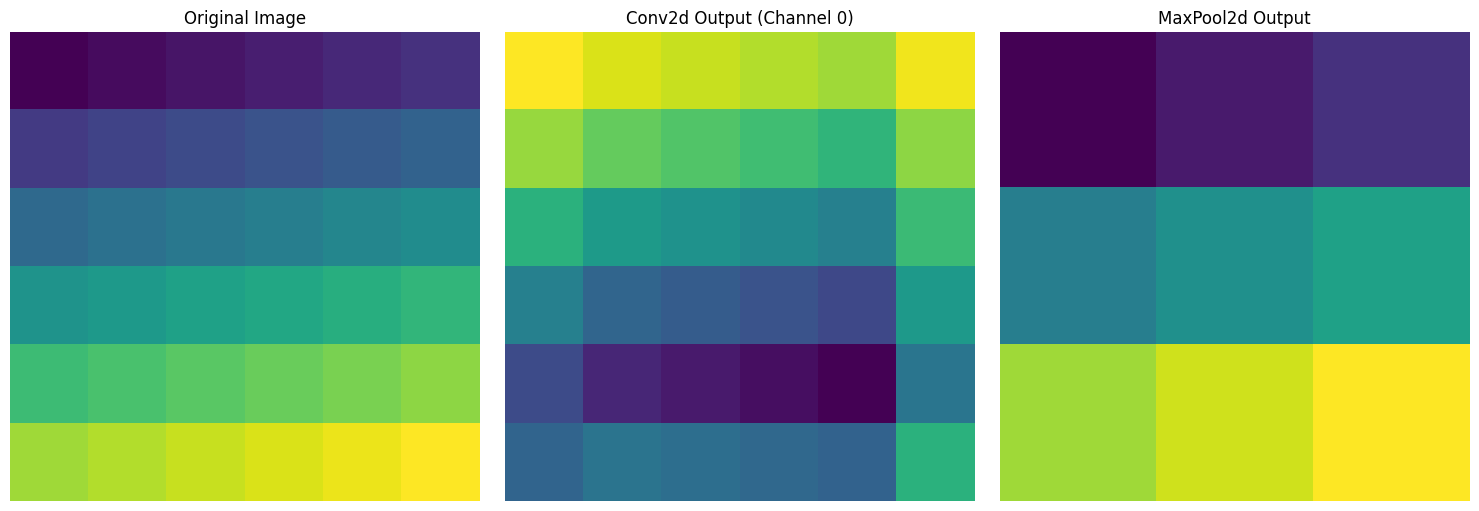

Input size: torch.Size([1, 1, 6, 6])
Convolution output size: torch.Size([1, 2, 6, 6])
Pooling output size: torch.Size([1, 1, 3, 3])


In [2]:
import torch
import matplotlib.pyplot as plt
from dldna.chapter_07.simple_conv import SimpleConv2d, SimpleMaxPool2d
# %matplotlib inline  # This line is only needed in Jupyter/IPython environments

# Input data creation (e.g., 1 image, 1 channel, 6x6 size)
x = torch.tensor([
    [1, 2, 3, 4, 5, 6],
    [7, 8, 9, 10, 11, 12],
    [13, 14, 15, 16, 17, 18],
    [19, 20, 21, 22, 23, 24],
    [25, 26, 27, 28, 29, 30],
    [31, 32, 33, 34, 35, 36]
], dtype=torch.float32).reshape(1, 1, 6, 6)

# SimpleConv2d test
conv = SimpleConv2d(in_channels=1, out_channels=2, kernel_size=3, padding=1)
conv_output = conv(x)

# SimpleMaxPool2d test
pool = SimpleMaxPool2d(kernel_size=2)
pool_output = pool(x)

# Visualize results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original image
axes[0].imshow(x[0, 0].detach().numpy(), cmap='viridis')
axes[0].set_title('Original Image')

# Convolution result (first channel)
axes[1].imshow(conv_output[0, 0].detach().numpy(), cmap='viridis')
axes[1].set_title('Conv2d Output (Channel 0)')

# Pooling result
axes[2].imshow(pool_output[0, 0].detach().numpy(), cmap='viridis')
axes[2].set_title('MaxPool2d Output')

for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()

# Print output sizes
print("Input size:", x.shape)
print("Convolution output size:", conv_output.shape)
print("Pooling output size:", pool_output.shape)

对于6x6大小的输入图像，我们可视化了三种结果。左边是从1到36依次增加的原始图像，中间是应用了3x3卷积滤波器的结果，右边是应用了2x2最大池化后尺寸减半的结果。

::: {.callout-note collapse="true" title="点击以查看内容（深入探讨：卷积运算的频率域解释和1x1卷积的意义）"}
## 卷积运算的频率域解释和1x1卷积的意义

探讨CNN的核心运算——卷积在频率域中的解析，特别是深入探究1x1卷积的意义。通过傅里叶变换和卷积定理来揭示卷积运算的隐藏含义。

### 1. 复习卷积运算

简要复习7.1.2节和7.1.3节中讨论的卷积运算。二维图像$I$与核（滤波器）$K$的卷积运算$I * K$定义如下。

$(I * K)[i, j] = \sum_{m} \sum_{n} I[i-m, j-n] K[m, n]$

其中$i$, $j$是输出图像的像素位置，$m$, $n$是核的像素位置。离散卷积（discrete convolution）是在图像上滑动核，并对重叠区域的元素进行逐个乘法后求和的过程。

### 2. 引入傅里叶变换 (Fourier Transform)

傅里叶变换是一种强大的工具，用于将时间域（空间域）中的信号转换为频率域中的表示。

*   **时间域 vs. 频率域:** 时间域是我们通常感知的信号形式（例如：随时间变化的图像像素值）。频率域显示了信号由哪些频率成分组成（例如：图像中包含的各种空间频率成分）。

*   **傅里叶变换的定义:** 傅里叶变换将信号分解为具有不同频率和幅度的正弦（sine）及余弦（cosine）函数之和。连续函数$f(t)$的傅里叶变换$\mathcal{F}\{f(t)\} = F(\omega)$定义如下。

    $F(\omega) = \int_{-\infty}^{\infty} f(t) e^{-j\omega t} dt$

    其中$j$是虚数单位，$\omega$是角频率。逆傅里叶变换（Inverse Fourier Transform）将频率域中的信号恢复到时间域。

    $f(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} F(\omega) e^{j\omega t} d\omega$

*   **离散傅里叶变换 (DFT) & 快速傅里叶变换 (FFT):** 由于计算机无法处理连续信号，因此使用离散傅里叶变换（Discrete Fourier Transform, DFT）。DFT对离散数据执行傅里叶变换。快速傅里叶变换（Fast Fourier Transform, FFT）是高效计算DFT的算法。DFT的公式如下。

   $X[k] = \sum_{n=0}^{N-1} x[n] e^{-j(2\pi/N)kn}$,  $k = 0, 1, ..., N-1$

   其中$x[n]$是离散信号，$X[k]$是DFT结果，$N$是信号的长度。

### 3. 卷积定理 (Convolution Theorem)

卷积定理解释了卷积运算与傅里叶变换之间的重要关系。其核心在于*时间域中的卷积在频率域中变为简单的乘法*。

*   **卷积定理:** 两个函数$f(t)$和$g(t)$的卷积$f(t) * g(t)$的傅里叶变换等于各自傅里叶变换的乘积。

    $\mathcal{F}\{f * g\} = \mathcal{F}\{f\} \cdot \mathcal{F}\{g\}$

    即，如果$F(\omega)$和$G(\omega)$分别是$f(t)$和$g(t)$的傅里叶变换，则$f(t) * g(t)$的傅里叶变换为$F(\omega)G(\omega)$。
*   **频率域的解释:** 卷积定理使我们能够在频率域中解释卷积运算。卷积滤波器的作用是强调或抑制输入信号的特定频率成分。在频率域中的乘法相当于调整相应频率成分的幅度。

### 4. 卷积滤波器的频率响应 (Frequency Response)

分析各种卷积滤波器的频率响应，可以了解滤波器允许哪些频率成分通过并阻挡哪些成分。

*   **频率响应可视化:** 计算滤波器的傅里叶变换可以获得其频率响应。频率响应通常用幅度(magnitude)和相位(phase)表示。幅度显示每个频率成分的振幅变化，相位显示相位变化。

*   **滤波器类型:**
    *   **Low-pass filter (低通滤波器):** 通过低频成分并阻挡高频成分。具有使图像模糊(blurring)的效果（例如：高斯滤波器）。
    *   **High-pass filter (高通滤波器):** 通过高频成分并阻挡低频成分。具有强调图像边缘(edge)的效果（例如：Sobel 滤波器）。
    *   **Band-pass filter (带通滤波器):** 只允许特定频率范围内的成分通过，其余的则被阻挡。

    下面是 Sobel 滤波器和高斯滤波器的频率响应可视化的示例。 （运行代码将生成图像。）

```python
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

def plot_frequency_response(kernel, title):
    # Calculate the 2D FFT of the kernel
    kernel_fft = np.fft.fft2(kernel, s=(256, 256)) # Zero-padding for better visualization
    kernel_fft_shifted = np.fft.fftshift(kernel_fft) # Shift zero frequency to center

    # Calculate the magnitude and phase
    magnitude = np.abs(kernel_fft_shifted)
    phase = np.angle(kernel_fft_shifted)

    # Plot the magnitude response
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(np.log(1 + magnitude), cmap='gray') # Log scale for better visualization
    plt.title(f'{title} - Magnitude Response')
    plt.colorbar()
    plt.axis('off')


    #Plot the phase response
    plt.subplot(1, 2, 2)
    plt.imshow(phase, cmap='hsv')
    plt.title(f'{title} - Phase Response')
    plt.colorbar()
    plt.axis('off')
    plt.show()
```
### 5. 1x1 卷积的频率域解释

1x1 卷积在保持空间信息的同时，执行通道间的运算。

*   **通道间线性组合：** 1x1 卷积在每个像素位置对通道进行 *线性组合*。这可以解释为在频率域中对各通道的频率成分进行 *加权求和*。即，1x1 卷积滤波器的权重表示了各通道频率成分的重要性。

*   **调节相关性和特征重构：** 1x1 卷积调节通道间的相关性（correlation）。通过结合具有强相关性的通道或移除不必要的通道来重构特征表达。

*   **在 Inception 模块中的作用：** 在 Inception 模块中，1x1 卷积承担两个重要角色。
    *   **降维：** 减少通道数以降低计算量。
    *   **增加非线性：** 在 1x1 卷积后应用 ReLU 等非线性激活函数以增强模型的表达能力。从频率响应的角度来看，这可以混合具有不同频率响应的通道，从而生成更复杂的频率响应。
:::

### 7.1.4 计算CNN的可学习参数

计算CNN的可学习参数数量对于网络设计和优化非常重要。我们逐步来看。

**1. 基本卷积层**
```python
conv = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
```
参数计算如下：
- 每个滤波器大小：3 × 3 × 1（内核尺寸² × 输入通道）
- 滤波器数量：32（输出通道）
- 偏置(bias)：32（与输出通道相同）
- 总参数 = (3 × 3 × 1) × 32 + 32 = 320 

**2. 最大池化层**
```python
maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
```
- 没有可学习的参数
- 只执行从2×2区域中选择最大值的操作
- 特征图大小减少（高度和宽度各自减半）

**3. 带填充的卷积**
```python
conv = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
```
填充仅影响输出大小，参数数量不变。
- 每个滤波器大小：3 × 3 × 3
- 滤波器数量：64
- 总参数 = (3 × 3 × 3) × 64 + 64 = 1,792

**4. 带步幅的卷积和池化的组合**
```python
conv = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=2)
maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
```
- 卷积参数 = (3 × 3 × 64) × 128 + 128 = 73,856
- 池化参数 = 0
- 总参数 = 73,856

输出大小计算。
```
卷积输出大小 = ((输入大小 + 2×填充 - 内核大小) / 步幅) + 1
池化输出大小 = ((输入大小 - 池化大小) / 池化步幅) + 1
```

**5. 复杂结构的例子（ResNet基本块）**

In [ ]:
class BasicBlock(nn.Module):
    def __init__(self, in_channels=64, out_channels=64):
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

参数计算。
1. 第一个卷积：(3 × 3 × 64) × 64 + 64 = 36,928
2. 第一批归一化：64 × 2 = 128（伽马和贝塔）
3. 第二个卷积：(3 × 3 × 64) × 64 + 64 = 36,928
4. 第二批归一化：64 × 2 = 128
5. 最大池化：0

总参数 = 74,112

这种参数数量的计算对于理解模型的复杂性、预测内存需求以及评估过拟合风险非常重要。特别是池化层，即使没有参数也可以有效地减少特征图的大小，从而大大提高计算效率。

### 7.1.5 CNN：学习特征提取与抽象

CNN 的核心在于通过“可学习的滤波器”从图像中提取特征，并将这些特征层次化地组合起来，以学习更抽象的表示。这一过程从图像的具体细节开始，逐步理解抽象意义（如：物体类型），可以分为以下两个主要方面。

1. **图像特征的提取与转换 (Feature Extraction and Transformation):** 从图像的局部区域中提取特征，并通过非线性激活函数保留有意义的特征。
2. **滤波器(通道)数增加和抽象空间的扩展 (Increasing Filters and Expanding Abstract Space):** 随着网络层数加深，逐渐增加滤波器（通道）的数量，以学习更多样化和抽象的特征。

#### 1. 图像特征的提取与转换

CNN 的卷积层通过应用 *可学习的滤波器* 来从输入图像（或前一层的特征图）中提取特征。每个滤波器都会针对特定模式（如：边缘、纹理、形状）进行训练以作出响应。这一过程包括以下步骤。

* **卷积运算:** 滤波器与图像的局部区域（感受野）相互作用，输出该区域内是否存在特定模式的值。通过此过程，在图像的每个位置生成表示滤波器检测到的特征强度的 *特征图(feature map)*。
* **激活函数:** 卷积运算的结果（特征图）通过 ReLU 等非线性激活函数。激活函数将只传递超过特定阈值的特征，而忽略其他特征。这有助于网络 *关注重要特征* 并 *去除不必要的信息*。（稀疏表示）
* **池化 (可选):** 池化层在减少特征图尺寸（下采样）的同时增强位置不变性（平移不变性）。例如，最大池化(max pooling)仅保留特定区域（如：2x2）内的最大值，并丢弃其余值。

经过这一过程，CNN 的每个卷积层将输入图像转换为 *特征空间*。该特征空间比原始像素空间更抽象，包含对分类或目标检测等任务更有用的信息。

#### 2. 滤波器(通道)数增加和抽象空间的扩展

CNN 具有堆叠多层卷积和池化运算的深层（deep）结构。在通过每一层时，特征图的空间尺寸（横向、纵向）通常 *减少*，而滤波器的数量（通道数量）则 *增加*。这是 CNN 学习 *抽象(abstraction)* 的核心机制。

* **空间尺寸减少:** 卷积(stride > 1) 或池化运算会减少特征图的空间尺寸。这可以减少计算量并增强位置不变性，即即使对象在图像中略有移动，也能识别为同一对象。
* **通道数增加:** 每个卷积层使用多个滤波器来捕捉输入特征图的 *不同方面*。
    * **初始层:** 检测边缘、颜色变化等 *低级* 特征。这些低级特征表示图像的基本组成部分。
    * **中间层:** 组合从初始层提取的低级特征，以检测纹理、图案、简单形状等 *中级* 特征。
    * **深层:** 结合从前一层中提取的特征，以检测对象的部分（眼睛、鼻子、嘴巴等），更进一步检测对象本身（人、汽车、动物等）等 *高级*, *抽象* 的特征。
滤波器（通道）数量的增加意味着CNN用于表示图像的*特征维度*在增加。初始层专注于图像的具体细节，而深层则学习对理解图像抽象意义所需的信息。这类似于人类观察物体时的过程：一开始关注具体的细节，逐渐掌握整体形状和意义。

**CNN 层结构的典型示例 (VGGNet):**

以下是展示 VGGNet 架构的图表。VGGNet 是一个典型的模型，系统地研究了 CNN 的深度对其性能的影响。

*   **VGGNet Architecture:** 

<figure>
    <img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png" alt="VGG16 Architecture" width="600">
    <figcaption>
        VGG16 架构。  <br>
        来源: K. Simonyan, A. Zisserman, "Very deep convolutional networks for large-scale image recognition," arXiv:1409.1556, 2014.
    </figcaption>
</figure>

从图中可以看出，VGGNet 具有多层卷积层和池化层的堆叠结构。随着每一层的传递，特征图的空间尺寸减小，通道数量增加。这在视觉上展示了 CNN 将图像从低维的具体表示（像素值）转换为高维的抽象表示（对象类型）的过程。

总之，CNN 的“可学习滤波器”是提取图像特征并将其层次化组合以学习更抽象表示的强大工具。通过多层卷积和池化操作，CNN 将图像转化为更小、更深、更抽象的表示，在此过程中从*数据中*学习理解图像意义所需的关键信息。这种特征提取和抽象能力是 CNN 在图像识别、对象检测、图像分割等各种计算机视觉任务中表现出色的核心原因。

::: {.callout-note collapse="true" title="点击查看内容（深入探讨：深度学习和机器学习中“核”术语的多种含义）"}
## 深度学习和机器学习中“核”术语的不同含义

> “词语本身没有意义，而是在上下文中才有意义。” - (语义学/语用学的基本原则)

在研究深度学习、机器学习以及信号处理领域时，“核(kernel)”这个术语经常出现。“核”的使用根据上下文会有*完全不同的*含义，因此对于初次接触的人来说可能会产生混淆。在这次深入探讨中，我们将明确“核”在不同上下文中使用的含义，并考察各个用例之间的关联性。

### 1. 卷积神经网络 (CNN) 中的核 (Convolution Kernel)

在CNN中，“核”通常与**滤波器(filter)**同义。卷积层(convolutional layer)中的核是对输入数据（图像或特征图）执行卷积运算的*小矩阵*。

*   **作用:** 从图像的局部区域(receptive field)中提取特征。
*   **工作方式:** 核在输入数据上滑动(stride)，同时将重叠区域的像素值与核的权重相乘，然后将这些值全部相加（卷积运算）。通过这一过程，核输出一个表示所检测模式（例如：边缘、纹理）在该位置显现强度的值。
*   **可学习:** 在CNN中，核的权重是通过反向传播(backpropagation)算法从数据中*学习*得到的。也就是说，CNN会自行调整核以提取对解决给定问题（如：图像分类）最有用的特征。
*  **示例: Sobel 核**

    $
    \begin{bmatrix}
    1 & 0 & -1 \\
    2 & 0 & -2 \\
    1 & 0 & -1
    \end{bmatrix}
    $
    这个3x3大小的Sobel核用于检测图像中的垂直边界(vertical edge)。

*   **核心:** 在CNN中，核具有*可学习的参数*，并承担从图像中提取*局部特征*的角色。

### 2. 支持向量机 (SVM) 中的核 (Kernel Function, Kernel Trick)

在支持向量机(Support Vector Machine, SVM)中，“核”是计算*两个数据点*之间*相似度*的函数。SVM通过将数据映射到高维特征空间(feature space)，解决非线性分类问题。核技巧(kernel trick)是一种技术，它不显式地进行这种高维映射，而是使用核函数隐式地计算高维空间中的内积(inner product)。

*   **作用:** 将数据映射到高维特征空间，将非线性分类问题转化为线性分类问题。
*   **核心:** *高效地*计算高维特征空间中的内积。（无需显式的映射）
*   **数学表达:**  $K(\mathbf{x}, \mathbf{y}) = \phi(\mathbf{x}) \cdot \phi(\mathbf{y})$
    *   $K(\mathbf{x}, \mathbf{y})$: 核函数（两个输入向量$\mathbf{x}$, $\mathbf{y}$之间的相似度）
    *   $\phi(\mathbf{x})$: 将输入向量$\mathbf{x}$映射到高维特征空间的函数
    *   $\cdot$: 内积(inner product)
*   **典型的核函数:**
    *   **线性核 (Linear Kernel):**  $K(\mathbf{x}, \mathbf{y}) = \mathbf{x}^T \mathbf{y}$ (简单内积)
    *   **多项式核 (Polynomial Kernel):** $K(\mathbf{x}, \mathbf{y}) = (\gamma \mathbf{x}^T \mathbf{y} + r)^d$
    *   **RBF 核 (Radial Basis Function Kernel, 高斯核):** $K(\mathbf{x}, \mathbf{y}) = \exp(-\gamma \|\mathbf{x} - \mathbf{y}\|^2)$  (最常用)
    *   **Sigmoid 核 (Sigmoid Kernel):**  $K(\mathbf{x}, \mathbf{y}) = \tanh(\gamma \mathbf{x}^T \mathbf{y} + r)$

*   **核心:** SVM中的核函数是测量*数据间相似度*的函数，通过*隐式映射到高维特征空间*来解决非线性问题。

### 3. 概率论及统计学中的核 (Kernel Density Estimation)

在概率论和统计学中，核函数是在核密度估计(Kernel Density Estimation, KDE)中使用的、以原点为中心且积分值为1的非负函数。KDE是一种基于给定数据（样本）*估计*概率密度函数(probability density function)的无参数(non-parametric)方法。

*   **作用:** 作为用于估算数据点周围密度的"权重函数"。
*   **核心:** 将核函数"叠加"在每个数据点上，以平滑(smooth)地表示整个数据分布。
*   **数学表达:**
    $\hat{f}(x) = \frac{1}{nh} \sum_{i=1}^{n} K\left(\frac{x - x_i}{h}\right)$
    *   $\hat{f}(x)$: 在$x$处的估计概率密度
    *   $n$: 数据点的数量
    *   $h$: 带宽(bandwidth) - 调整核函数"宽度"的参数 (平滑参数)
    *   $K(\cdot)$: 核函数
    *   $x_i$: 第$i$个数据点

*   **典型的核函数:**
    *   **高斯核 (Gaussian Kernel):**  $K(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}x^2}$ (最常用)
    *   **Epanechnikov 核:** $K(x) = \frac{3}{4}(1 - x^2) \text{ if } |x| \le 1$
    *   **Uniform 核 (Box Kernel):** $K(x) = \frac{1}{2} \text{ if } |x| \le 1$

*   **核心:** 在KDE中，核函数作为用于*估计概率密度函数*的*权重函数*。

### 4. 操作系统内核 (Operating System Kernel)

在计算机科学，特别是操作系统(Operating System)领域，内核是操作系统的中心组成部分。它充当硬件和应用程序之间的接口，在系统的最低层运行。

* **作用:**
    * 进程管理
    * 内存管理
    * 文件系统管理
    * 输入输出(I/O)管理
    * 硬件资源管理
* **示例:** Linux 内核, Windows NT 内核, macOS 的 XNU 内核

### 总结及比较
| 领域                     | 核的意义                                                                                                                                | 核心作用                                                                                                |
| :----------------------- | :-------------------------------------------------------------------------------------------------------------------------------------- | :-------------------------------------------------------------------------------------------------------------------- |
| CNN                      | 执行卷积运算的滤波器（可学习的权重矩阵）                                                                                                       | 提取图像的局部特征                                                                                           |
| SVM                      | 计算两个数据点之间相似度的函数（隐式映射到高维特征空间）                                                                                                 | 将非线性数据映射到高维空间以实现线性分离                                                                         |
| 概率论/统计 (KDE)        | 用于估计概率密度函数的权重函数                                                                                                               | 平滑地估计数据分布                                                                                           |
| 操作系统                 | 操作系统的中心组成部分（硬件和应用程序之间的接口）                                                                                                    | 系统资源管理，硬件抽象                                                                                  |
| 线性代数(Linear Algebra) | 线性变换（或矩阵）的零空间，即满足$A\mathbf{x}=\mathbf{0}$的向量$\mathbf{x}$的集合（对于线性映射$T:V→W$有$\text{Ker}(T)=\{\mathbf{v}∈V∣T(\mathbf{v})=\mathbf{0}\} $） | 表示线性变换的特性 |
在深度学习，尤其是CNN中，“内核”通常指卷积滤波器。但是，当接触SVM或高斯过程等其他机器学习算法时，应记住“内核”也可以表示核函数。根据上下文准确理解“内核”的含义非常重要。
:::

## 7.2 ResNet的出现

> **挑战:** 如何在增加神经网络深度的同时，避免梯度消失/爆炸问题，并稳定地进行学习？
>
> **研究者的困境:** 随着CNN在图像识别中表现出色，研究人员试图构建更深的网络。然而，随着网络变深，反向传播过程中出现了梯度消失（vanishing gradients）和梯度爆炸（exploding gradients）的问题，导致学习无法正常进行。简单的线性变换重复限制了深度网络的表现力。如何克服这一根本性的局限，并充分利用神经网络的深度？

随着CNN在图像识别领域取得令人惊讶的成功，研究人员自然而然地提出了“更深的网络是否能提供更好的性能？”这个问题。理论上，更深层次的网络应该能够学习更复杂和抽象的特征。然而，在实际中，网络越深，*训练误差（training error）反而增加*的现象出现了。

### 7.2.1 深度神经网络的问题与ResNet的诞生

2015年，微软研究团队（Kaiming He等）发表了一篇论文，提出了解决这一问题的创新方案。他们通过实验表明，深度神经网络学习的困难并不是由于过拟合，而是由于优化（optimization）的困难，即使是在训练数据上也无法有效减少误差。

研究团队观察到56层神经网络在*训练数据*上的误差比20层神经网络更大。这与56层网络至少应该达到20层网络性能的直觉相悖。（如果56层网络能够学习其余36层为恒等映射（identity mapping），它就能表示20层网络的功能）因此，他们提出了一个根本性的问题：“为什么随着深度增加，神经网络甚至无法学会简单的恒等映射（identity mapping）？”

为了克服这一问题，研究团队提出了一种非常简单而强大的想法——**残差学习（Residual Learning）**。其核心思想是让神经网络*直接*学习目标函数$H(x)$的*差异*，即*残差（residual）*$F(x) = H(x) - x$，而不是直接学习目标函数$H(x)$。

**残差学习的数学表示:**

$H(x) = F(x) + x$

*   $x$: 输入
*   $F(x)$: 残差函数（residual function）- 神经网络需要学习的对象
*   $H(x)$: 目标函数（desired mapping）

如果恒等映射($H(x) = x$)是最优的，那么神经网络只需要学会将残差函数$F(x)$设置为0。这比直接学习整个$H(x)$要容易得多。

**残差连接（Residual Connection / Skip Connection）:**

实现残差学习想法的就是*残差连接（residual connection）*或*跳过连接（skip connection）*。残差连接创建了一条将输入$x$直接加到层输出的路径。

**对ResNet的直观理解:**

ResNet中的残差连接类似于电子工程中的反馈（feedback）电路。即使信号在通过层时被扭曲或减弱，由于存在原始信号直接传递的路径（shortcut connection），信息（以及梯度）可以无损地在网络中流动。

**ResNet的成功:**
ResNet通过残差学习和跳过连接，成功训练了152层这样以前无法训练的非常深的网络。因此，在2015年ILSVRC（ImageNet大规模视觉识别挑战赛）中，以3.57%的错误率胜出，这一错误率低于人类的错误率（约5%），令人惊讶。

ResNet的残差连接是一个简单但非常强大的想法，对后续深度学习架构的发展产生了深远的影响。

*   **Transformer (2017):** 带来自然语言处理领域革命的Transformer架构采用了ResNet的跳过连接，形式为"Add & Norm"层。
*   **DenseNet (2017):** DenseNet扩展了ResNet的想法，使用了“密集连接”，即每一层都直接与之前所有层的输出相连。
*   **Inception-ResNet:** 将GoogLeNet的Inception模块和ResNet的残差连接结合的模型。
*   **EfficientNet, MobileNetV2:** EfficientNet、MobileNetV2等轻量级网络也采用了ResNet的残差学习概念。

### 7.2.2 ResNet的结构和关键元素

ResNet主要由两种类型的块构成，即基本块(Basic Block)和瓶颈块(Bottleneck Block)。

*   **基本块 (Basic Block):** 用于ResNet-18和ResNet-34。由两个3x3卷积层组成，每个卷积层后面跟着批归一化(Batch Normalization)和ReLU激活函数。最重要的是，*残差连接(residual connection)*以将这两层的输入加到输出的形式构成。

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class BasicBlock(nn.Module):
    """Basic block for ResNet
    Consists of two 3x3 convolutional layers
    """
    expansion = 1  # Output channel expansion factor

    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()
        # First convolutional layer
        self.conv1 = nn.Conv2d(in_channels, out_channels,
                              kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)

        # Second convolutional layer
        self.conv2 = nn.Conv2d(out_channels, out_channels * self.expansion,
                              kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels * self.expansion)

        # Skip connection (adjust dimensions with 1x1 convolution if necessary)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels * self.expansion:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels * self.expansion,
                         kernel_size=1, stride=stride),
                nn.BatchNorm2d(out_channels * self.expansion)
            )

    def forward(self, x):
        # Main path
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))

        # Add skip connection
        out += self.shortcut(x)
        out = F.relu(out)
        return out

*   **残差连接 (Residual Connection):** `out += self.shortcut(x)` 部分是核心。直接将输入添加到输出。
*   **维度调整:** 如果输入通道数和输出通道数不同，或者步幅不是1导致特征图的大小发生变化，则通过 `self.shortcut` 应用1x1卷积来匹配通道数和大小。

**瓶颈块 (Bottleneck Block)** 

在ResNet-50及以上版本中使用。用于更高效地构建更深的网络。由1x1、3x3、1x1卷积组合而成，结构上像是一个瓶颈(bottleneck)，先减少再增加通道数。

In [ ]:
class Bottleneck(nn.Module):
    """병목(Bottleneck) 구조 구현"""
    
    expansion = 4  # 출력 채널을 4배로 확장하는 상수

    def __init__(self, in_channels, out_channels, stride=1):
        """
        Args:
            in_channels: 입력 채널 수
            out_channels: 중간 처리 채널 수 (최종 출력은 이것의 expansion배)
            stride: 스트라이드 크기 (기본값: 1)
        """
        super().__init__()

        # 1단계: 1x1 컨볼루션으로 채널 수를 줄임 (차원 감소)
        # 예: 256 -> 64 채널로 감소
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        
        # 2단계: 3x3 컨볼루션으로 특징 추출 (병목 구간)
        # 감소된 채널 수로 연산 수행 (예: 64채널에서 처리)
        self.conv2 = nn.Conv2d(out_channels, out_channels, 
                              kernel_size=3, stride=stride, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        # 3단계: 1x1 컨볼루션으로 채널 수를 다시 늘림 (차원 복원)
        # 예: 64 -> 256 채널로 확장 (expansion=4인 경우)
        self.conv3 = nn.Conv2d(out_channels, 
                              out_channels * self.expansion, kernel_size=1)
        self.bn3 = nn.BatchNorm2d(out_channels * self.expansion)

瓶颈（Bottleneck）结构正如其名称所暗示的，像瓶子的颈部一样，通道的维度先变窄再变宽。例如假设有一个具有256个输入通道的特征图

1. 通过第一个1x1卷积将256→64维减少

2. 在减少后的64通道上执行3x3卷积

3. 通过最后一个1x1卷积将64→256维恢复

这种结构具有以下优点。
- 计算量减少：在较少的通道上执行成本最高的3x3卷积
- 参数数量减少：总参数数量比基本块大幅减少
- 表现力保持：在增加维度的过程中保留了学习各种特征的能力

由于这种效率，在ResNet-50及更深的模型中，采用了瓶颈结构而不是基本块。

跳跃连接有两种形式。当输入输出通道数相同时直接连接，不同时通过1x1卷积调整通道数。这受到了GoogLeNet（2014年）的Inception模块的启发。

ResNet通过堆叠多个这些基本块或瓶颈块来构建深度网络。

ResNet根据网络的深度有不同的版本（ResNet-18, ResNet-34, ResNet-50, ResNet-101, ResNet-152等）。

*   **ResNet-18, ResNet-34:** 使用基本块(Basic Block)。
*   **ResNet-50, ResNet-101, ResNet-152:** 使用瓶颈块(Bottleneck Block)。

ResNet的一般结构如下：

1.  **初始卷积层:** 使用7x7的卷积和最大池化(max pooling)减少输入图像的尺寸。
2.  **多个阶段 (Stage):** 每个阶段由多个块（基本块或瓶颈块）组成。每个阶段的第一个块将步幅(stride)设置为2，以将特征图的大小减半(下采样)。
3.  **平均池化 (Average Pooling):** 去除特征图的空间维度。(全局平均池化)
4.  **全连接层 (Fully Connected Layer):** 执行类别分类。

**网络深度和块数:**

ResNet的深度由每个阶段的块数决定。例如，ResNet-18在每个阶段使用2个基本块([2, 2, 2, 2])。 ResNet-50在每个阶段分别使用[3, 4, 6, 3]个瓶颈块。

*   **ResNet-18:**
    *   初始7x7卷积层: 1层
    *   基本块 (2个3x3的卷积): 2层 x (2 + 2 + 2 + 2) = 16层
    *   最终全连接层: 1层
    *   总共 1 + 16 + 1 = 18层

In [ ]:
# 총 층수 = 1 + (2 × 2 + 2 × 2 + 2 × 2 + 2 × 2) + 1 = 18
def ResNet18(num_classes=10):
    return ResNet(BasicBlock, [2, 2, 2, 2], num_classes) # 기본 블록 사용

*   **ResNet-50:**
    *   初始7x7卷积: 1层
    *   瓶颈块（3个卷积）: 3层 x (3 + 4 + 6 + 3) = 48层
    *   最终全连接层: 1层
    *   总计 1 + 48 + 1 = 50层

In [ ]:
# 병목 블록: 1x1 → 3x3 → 1x1 구조
# 총 층수 = 1 + (3 × 3 + 3 × 4 + 3 × 6 + 3 × 3) + 1 = 50
def ResNet50(num_classes=10):
    return ResNet(Bottleneck, [3, 4, 6, 3], num_classes) # 병목 블록 사용

**ResNet设计原则:**

*   **四个阶段:** 每个阶段的特征图大小减半，通道数量加倍。这是遵循了VGGNet的设计理念。
*   **中间阶段放置更多块:** 通常在中间阶段（stage 3）放置更多的块。这基于中层特征在对象识别中的重要性的经验证据。
*   **瓶颈结构（深度网络）:** 网络越深，为了计算效率而使用瓶颈结构。

由于这些结构性创新，ResNet能够高效地学习非常深的网络，这成为了现代深度学习架构的标准。ResNet的思想影响了Wide ResNet、ResNeXt、DenseNet等多种变体模型。

### 7.2.4 ResNet的训练和特征提取可视化

在chapter_07/train_resnet.py中有一个使用ResNet-18模型对FashionMNIST数据集进行训练的示例。

In [ ]:
from dldna.chapter_07.train_resnet import train_resnet18, save_model

model = train_resnet18(epochs=10)
# Save the model
save_model(model)

我们将实际检查ResNet如何提取图像的特征。使用训练好的ResNet-18模型，我们将在通过每一层时可视化特征图的变化。

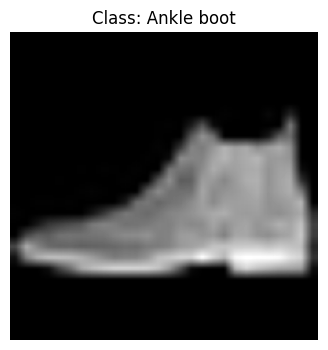

이미지 shape: torch.Size([1, 224, 224])
실제 클래스: Ankle boot (레이블: 9)
예측 클래스: Ankle boot (레이블: 9)


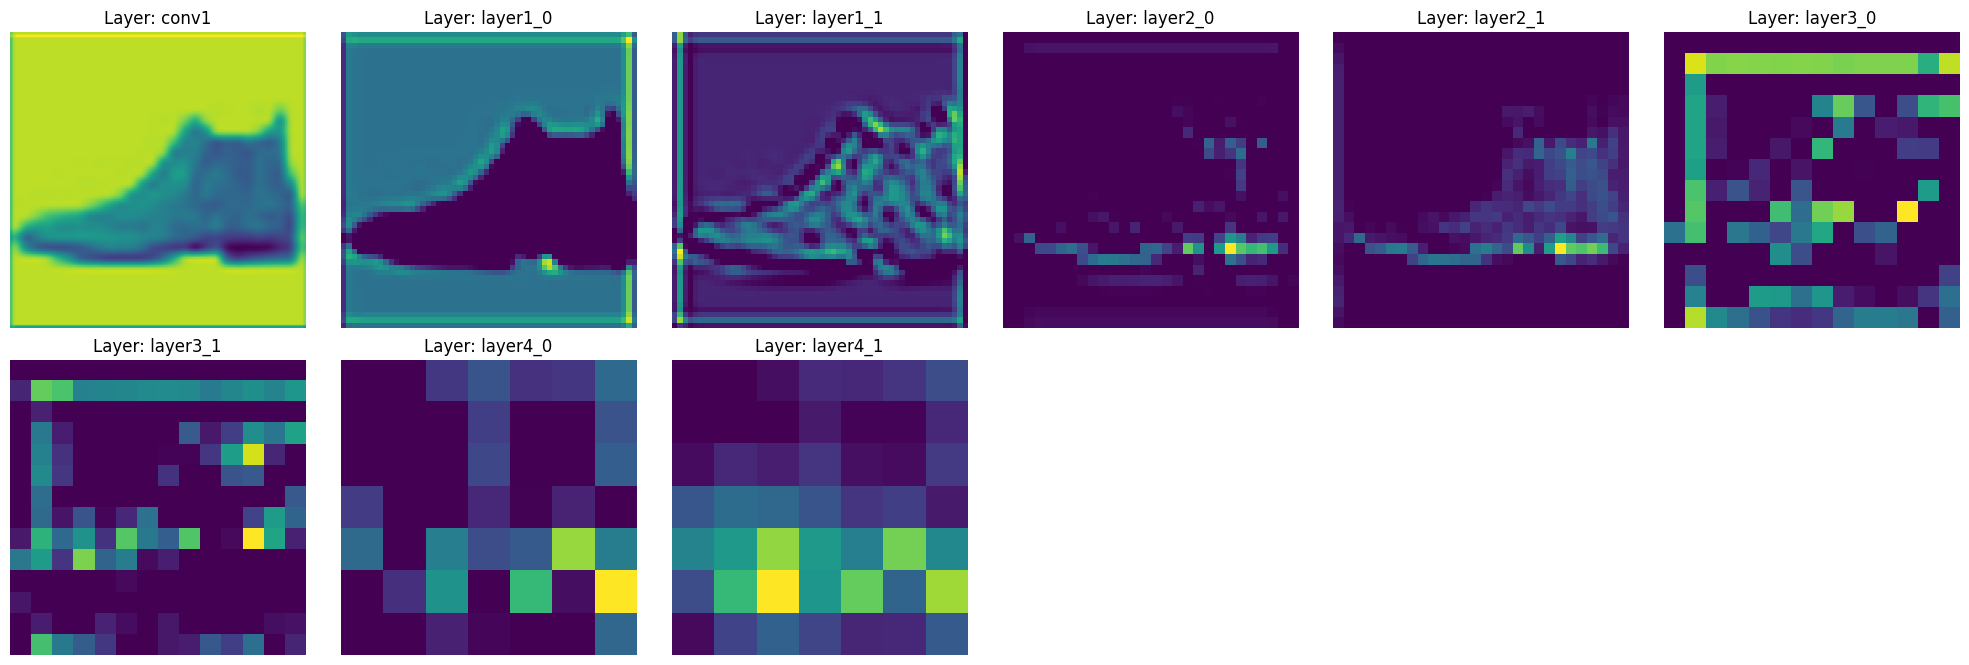

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from dldna.chapter_07.resnet import ResNet18
from dldna.chapter_07.train_resnet import get_trained_model_and_test_image
from torchvision import datasets, transforms

%matplotlib inline

def visualize_features(model, image):
    """각 층의 특징 맵을 시각화하는 함수"""
    features = {}
    
    # 특징 맵을 저장할 훅 등록
    def get_features(name):
        def hook(model, input, output):
            features[name] = output.detach()
        return hook

    # 각 주요 층에 훅 등록
    model.conv1.register_forward_hook(get_features('conv1'))
    for idx, layer in enumerate(model.layer1):
        layer.register_forward_hook(get_features(f'layer1_{idx}'))
    for idx, layer in enumerate(model.layer2):
        layer.register_forward_hook(get_features(f'layer2_{idx}'))
    for idx, layer in enumerate(model.layer3):
        layer.register_forward_hook(get_features(f'layer3_{idx}'))
    for idx, layer in enumerate(model.layer4):
        layer.register_forward_hook(get_features(f'layer4_{idx}'))

    # 모델에 이미지 통과
    with torch.no_grad():
        _ = model(image.unsqueeze(0))

    # 특징 맵 시각화
    plt.figure(figsize=(20, 10))
    for idx, (name, feature) in enumerate(features.items(), 1):
        plt.subplot(3, 6, idx)
        # 각 층의 첫 번째 채널만 시각화
        plt.imshow(feature[0, 0].cpu(), cmap='viridis')
        plt.title(f'Layer: {name}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return features

model, test_image, label, pred, classes = get_trained_model_and_test_image()

# 원본 이미지 시각화
plt.figure(figsize=(4, 4))
plt.imshow(test_image.squeeze(), cmap='gray')
plt.title(f'Class: {classes[label]}')
plt.axis('off')
plt.show()

print(f"이미지 shape: {test_image.shape}")
print(f"실제 클래스: {classes[label]} (레이블: {label})")
print(f"예측 클래스: {classes[pred]} (레이블: {pred})")

# # ResNet 모델에 이미지 통과시키고 특징 맵 시각화
# model = ResNet18(in_channels=1, num_classes=10)
# model.load_state_dict(torch.load('../../models/resnet18_fashion.pth'))
# model.eval()

features = visualize_features(model, test_image)

执行此代码可以观察特征如何通过ResNet-18的主要层发生变化。

1. 初始卷积 (conv1) : 提取基本形态信息，检测边缘和纹理等低级特征
2. layer1 (初始残差块) : 结合局部特征并开始组合简单模式
3. layer2 : 特征图的大小减小，但通道数增加，从而识别更复杂的模式
4. layer3 : 抽象水平进一步提高，检测对象的部分特征
5. layer4 (最终残差块) : 提取区分类所需的抽象高级特征

这种分层特征提取是ResNet的核心优势之一。由于跳过连接，可以验证每个层次的特征都得到良好保留，并逐渐抽象化。

::: {.callout-note collapse="true" title="点击查看内容（深度解析：Inception 模块 - 为 CNN 增添多样性和效率）"}
## Inception 模块 - 为CNN增加多样性和效率

Inception 模块是2014年ImageNet Large Scale Visual Recognition Challenge (ILSVRC)冠军GoogLeNet[^1]的核心组成部分。该模块提出了对传统CNN结构的新方法，就像它的别名“Network in Network”一样。如果说ResNet解决了“深度(depth)”的问题，那么Inception 模块则同时解决了“多样性(diversity)”和“效率(efficiency)”这两个重要问题。在这次深入探讨中，我们将详细分析Inception模块的核心思想、数学原理及其进化过程，并探讨其对深度学习尤其是CNN架构设计的影响。

### Inception 模块的核心思想：“多尺度”特征提取

Inception 模块提出了一个优雅的解决方案：*并行使用不同大小的滤波器*并将结果（feature map）*组合(concatenate)*。

**核心思想:**

1.  **多种滤波器:** 在相同的输入上应用1x1、3x3、5x5等不同尺寸的卷积滤波器。
2.  **并行处理:** 每个滤波器独立执行卷积运算。
3.  **组合 (Concatenation):** 将每个滤波器生成的特征图(feature map)沿通道(channel)轴进行组合。
4.  **1x1 卷积:** 减少计算成本，增加非线性，并混合通道间信息。（“瓶颈层”作用）

### Inception Module v1 (GoogLeNet, 2014)

Inception 模块的第一个版本（GoogLeNet, [^1]）具有以下结构。

*   **输入:** 前一层的特征图(feature map)
*   **并行分支(Branches):**
    *   1x1 卷积
    *   1x1 卷积 -> 3x3 卷积
    *   1x1 卷积 -> 5x5 卷积
    *   3x3 最大池化(max pooling) -> 1x1 卷积
*   **输出:** 将每个分支的输出沿通道轴进行组合(concatenate)

**1x1 卷积的作用:**

1x1 卷积在Inception 模块中起着非常重要的作用。

*   **降维 (Dimensionality Reduction):** 1x1 卷积用于减少通道数。在3x3或5x5卷积*之前*使用1x1卷积来减少通道数，可以大幅减少计算量。（瓶颈层, Bottleneck Layer）
*   **增加非线性:** 在1x1卷积后添加ReLU等激活函数，可向网络中增加非线性。
*   **混合通道间信息:** 1x1 卷积通过计算输入通道的线性组合，产生混合通道间信息的效果。

**Inception Module v1 的局限:**

*   5x5卷积仍然具有较高的计算成本。
*   池化运算虽然可以降维，但可能导致信息损失。

### Inception Module v2 & v3 (2015)

为了改进v1的局限性，Inception v2和v3引入了以下想法[^2]。
*   **分解：** 5x5 卷积分解为两个3x3卷积。（减少计算量）
*   **非对称卷积：** 3x3 卷积分解为1x3卷积和3x1卷积。
*   **辅助分类器：** 在训练过程中添加辅助分类器（auxiliary classifier）以缓解梯度消失问题，并加速学习。（v3中移除）
*   **标签平滑：** 向正确标签添加少量噪声，防止模型过度自信（overconfidence）。

### Inception 模块 v4 (2016)

Inception-v4 引入了 Inception-ResNet 模块，将 Inception 模块与 ResNet 的残差连接（residual connection）结合 [^3]。

### Xception (2017)

Xception ("Extreme Inception") 是对 Inception 模块思想的极限扩展模型 [^4]。使用深度可分离卷积（Depthwise Separable Convolution），将通道间空间方向卷积（depthwise convolution）和跨通道卷积（pointwise convolution, 1x1 conv）分开。

### 数学表达 (Inception v1)

每个 Inception 模块的分支可以表示如下：

*   **Branch 1:**
    $\text{Output}_1 = \text{Conv}_{1x1}(\text{Input})$
*   **Branch 2:**
    $\text{Output}_2 = \text{Conv}_{3x3}(\text{Conv}_{1x1}(\text{Input}))$
*   **Branch 3:**
    $\text{Output}_3 = \text{Conv}_{5x5}(\text{Conv}_{1x1}(\text{Input}))$
*   **Branch 4:**
    $\text{Output}_4 = \text{Conv}_{1x1}(\text{MaxPool}(\text{Input}))$
*   **Output:**
    $\text{Concatenate}(\text{Output}_1, \text{Output}_2, \text{Output}_3, \text{Output}_4)$

其中，$\text{Conv}_{NxN}$ 表示 $N \times N$ 大小的卷积运算，$\text{MaxPool}$ 表示最大池化运算。

### 与小波变换的相似性

Inception 模块的多尺度（multi-scale）方法与小波变换（wavelet transform）有相似之处。小波变换是将信号分解为不同频率成分的方法。可以将 Inception 模块中的每个滤波器（1x1, 3x3, 5x5）视为提取不同频带，即不同尺度的特征。1x1 卷积可被视为提取高频成分，3x3 提取中频，而 5x5 提取低频成分。

### Inception 模块的优点

*   **多种尺度的特征提取：** 同时使用多个尺寸的滤波器可以有效捕捉图像内的各种尺度特征。
*   **计算效率：** 使用1x1卷积减少维度，从而在保持表现力的同时减少计算量。
*   **强大性能：** 在 ImageNet 数据集上达到了顶级性能。

### 对深度学习生态系统的影响
Inception模块为CNN架构设计提供了新的视角。它不仅展示了“更深（deeper）”的重要性，还强调了“更宽（wider）”和“更多样化（more diverse）”的价值。Inception模块的思想对后来的MobileNet、ShuffleNet等轻量级模型开发也产生了影响。

### 简单的Inception模块实现 (PyTorch)

```python
import torch
import torch.nn as nn
import torch.nn.functional as F

class InceptionModule(nn.Module):
    def __init__(self, in_channels, out_channels_1x1, out_channels_3x3_reduce,
                 out_channels_3x3, out_channels_5x5_reduce, out_channels_5x5,
                 out_channels_pool):
        super().__init__()

        # 1x1 conv branch
        self.branch1x1 = nn.Conv2d(in_channels, out_channels_1x1, kernel_size=1)

        # 1x1 conv -> 3x3 conv branch
        self.branch3x3_reduce = nn.Conv2d(in_channels, out_channels_3x3_reduce, kernel_size=1)
        self.branch3x3 = nn.Conv2d(out_channels_3x3_reduce, out_channels_3x3, kernel_size=3, padding=1)

        # 1x1 conv -> 5x5 conv branch
        self.branch5x5_reduce = nn.Conv2d(in_channels, out_channels_5x5_reduce, kernel_size=1)
        self.branch5x5 = nn.Conv2d(out_channels_5x5_reduce, out_channels_5x5, kernel_size=5, padding=2)

        # 3x3 max pool -> 1x1 conv branch
        self.branch_pool = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.branch_pool_proj = nn.Conv2d(in_channels, out_channels_pool, kernel_size=1)

    def forward(self, x):
        branch1x1 = F.relu(self.branch1x1(x))

        branch3x3 = F.relu(self.branch3x3_reduce(x))
        branch3x3 = F.relu(self.branch3x3(branch3x3))

        branch5x5 = F.relu(self.branch5x5_reduce(x))
        branch5x5 = F.relu(self.branch5x5(branch5x5))

        branch_pool = F.relu(self.branch_pool_proj(self.branch_pool(x)))

        outputs = [branch1x1, branch3x3, branch5x5, branch_pool]
        return torch.cat(outputs, 1)  # Concatenate along the channel dimension
```
# 示例用法
in_channels = 3  # 示例输入通道数
out_channels_1x1 = 64
out_channels_3x3_reduce = 96
out_channels_3x3 = 128
out_channels_5x5_reduce = 16
out_channels_5x5 = 32
out_channels_pool = 32

inception_module = InceptionModule(in_channels, out_channels_1x1, out_channels_3x3_reduce,
                                  out_channels_3x3, out_channels_5x5_reduce, out_channels_5x5,
                                  out_channels_pool)

# 示例输入张量 (batch_size, channels, height, width)
input_tensor = torch.randn(1, in_channels, 28, 28)
output_tensor = inception_module(input_tensor)
print(output_tensor.shape)  # 检查输出形状
```

这段代码使用 PyTorch 实现了 Inception Module (v1) 的基本结构。`torchvision.models` 或 `timm` 库中实现了更高级的 Inception 网络版本（如 Inception-v3、Inception-v4、Inception-ResNet 等），因此在实际项目中最好使用这些库。

---

[1]: Szegedy, C., Liu, W., Jia, Y., Sermanet, P., Reed, S., Anguelov, D., ... & Rabinovich, A. (2015). Going deeper with convolutions. In *Proceedings of the IEEE conference on computer vision and pattern recognition* (pp. 1-9).

[2]: Szegedy, C., Vanhoucke, V., Ioffe, S., Shlens, J., & Wojna, Z. (2016). Rethinking the inception architecture for computer vision. In *Proceedings of the IEEE conference on computer vision and pattern recognition* (pp. 2818-2826).

[3]: Szegedy, C., Ioffe, S., Vanhoucke, V., & Alemi, A. A. (2017). Inception-v4, inception-resnet and the impact of residual connections on learning. In *Thirty-first AAAI conference on artificial intelligence*.

[4]: Chollet, F. (2017). Xception: Deep learning with depthwise separable convolutions. In *Proceedings of the IEEE conference on computer vision and pattern recognition* (pp. 1251-1258).
```
:::

## 7.3 EfficientNet: 高效的模型缩放

> **挑战:** 如何在最大化模型性能的同时，最小化计算成本（参数数量、FLOPS）？
>
> **研究者的困扰:** ResNet 的出现使得训练深层网络成为可能，但如何调整模型的大小并没有系统的方法。仅仅堆叠更多的层或增加通道数可能会大幅增加计算成本。研究人员试图找到模型深度(depth)、宽度(width)、分辨率(resolution)之间的最佳平衡，并在此基础上实现给定计算资源下的最优性能。

### 7.3.1 复合缩放: 深度、宽度、分辨率的平衡

EfficientNet 的核心思想是“复合缩放”。之前的大多数研究倾向于只调整模型的深度、宽度或分辨率之一，而 EfficientNet 发现同时且均衡地调整这三个因素更为高效。

*   **深度 (Depth):** 网络的层数。更深的网络可以学习更复杂的特征，但容易出现梯度消失/爆炸问题和过拟合。
*   **宽度 (Width):** 每层的通道数（滤波器数）。更宽的网络可以学习到更细微的特征(fine-grained features)，但计算成本和参数数量增加，且存在过拟合的风险。
*   **分辨率 (Resolution):** 输入图像的大小。更高分辨率的图像包含更多信息，但也大幅增加了计算成本。

EfficientNet 通过实验展示了这三个因素之间是相互关联的，并且相比于只改变一个因素，*均衡地*同时调整它们更为有效。例如，如果将图像分辨率提高两倍，则需要适当增加深度和宽度，以使网络能够学习更细微的模式。仅仅提高分辨率可能会导致性能提升微乎其微或反而下降。

在 EfficientNet 的论文中，模型缩放问题被定义为优化问题，并通过以下公式表达了深度(depth)、宽度(width)、分辨率(resolution)之间的关系。

首先，将 CNN 模型记作 $\mathcal{N}$，则第 $i$ 层可以表示为函数变换 $Y_i = \mathcal{F}_i(X_i)$。这里，$Y_i$ 是输出张量，$X_i$ 是输入张量，$\mathcal{F}_i$ 是运算(operator)。输入张量 $X_i$ 的形式可表示为 $<H_i, W_i, C_i>$，分别代表高度(height)、宽度(width)和通道(channel)数。

整个 CNN 模型 $\mathcal{N}$ 可以表示为各层函数的复合

$\mathcal{N} = \mathcal{F}_k \circ \mathcal{F}_{k-1} \circ ... \circ \mathcal{F}_1 = \bigodot_{i=1...k} \mathcal{F}_i$

在一般的 CNN 设计中，主要集中在寻找最优的层运算 $\mathcal{F}_i$，而 EfficientNet 则固定了层运算，专注于调整网络的长度($\hat{L}_i$)、宽度($\hat{C}_i$)和分辨率($\hat{H}_i, \hat{W}_i$)。为此，定义基准网络(baseline network)为 $\hat{\mathcal{N}}$，并通过乘以缩放系数来扩展模型。
基准网络: $\hat{\mathcal{N}} = \bigodot_{i=1...s} \hat{\mathcal{F}}_i^{L_i}(X_{<H_i, W_i, C_i>})$

EfficientNet旨在解决以下优化问题。

$\underset{\mathcal{N}}{maximize}\quad Accuracy(\mathcal{N})$

$subject\ to\quad \mathcal{N} = \bigodot_{i=1...s} \hat{\mathcal{F}}_i^{d \cdot \hat{L}_i}(X_{<r \cdot \hat{H}_i, r \cdot \hat{W}_i, w \cdot \hat{C}_i>})$

$Memory(\mathcal{N}) \leq target\_memory$

$FLOPS(\mathcal{N}) \leq target\_flops$

其中，$d$、$w$、$r$分别是深度、宽度和分辨率的缩放系数。

EfficientNet为了解决这个问题，提出了一种**复合缩放**方法，该方法简化了复杂的优化问题，在同时满足所有资源约束条件（resource constraints）的情况下最大化精度。复合缩放使用一个系数($\phi$, compound coefficient)来均匀调整深度、宽度和分辨率。

$\begin{aligned}
& \text{depth: } d = \alpha^{\phi} \\
& \text{width: } w = \beta^{\phi} \\
& \text{resolution: } r = \gamma^{\phi} \\
& \text{subject to } \alpha \cdot \beta^2 \cdot \gamma^2 \approx 2 \\
& \alpha \geq 1, \beta \geq 1, \gamma \geq 1
\end{aligned}$

*   $\phi$ (phi) 是用户指定的系数（compound coefficient），用于调整模型的整体大小。
*   $\alpha$, $\beta$, $\gamma$ 分别是决定深度、宽度和分辨率增加多少的常数。这些值通过小网格搜索（small grid search）来确定。（为了找到 $\alpha$, $\beta$, $\gamma$ 的值，固定 $\phi=1$ 并进行小规模搜索。）
*   约束条件 ($α ⋅ β² ⋅ γ² ≈ 2$) 是为了让模型的 FLOPS 在每次增加 $ϕ$ 时大约翻倍。此约束条件是由于FLOPS随深度线性增长，而随宽度和分辨率平方增长而设置的。

通过使用这种复合缩放方法，用户只需调整一个 $\phi$ 值即可轻松调整模型大小，并能有效控制模型性能与效率之间的平衡。

### 7.3.2 EfficientNet架构

EfficientNet利用AutoML (Neural Architecture Search, NAS)技术找到了最优的基础模型（baseline model）EfficientNet-B0，并在此基础上应用复合缩放，生成了各种尺寸的模型（B1 ~ B7，以及更大的L2）。

**EfficientNet-B0的结构:**

EfficientNet-B0基于从MobileNetV2中获得灵感的MBConv (Mobile Inverted Bottleneck Convolution)块。为了提高计算效率，MBConv块具有以下结构。
1.  **Expansion (1x1 Conv):** 扩展输入通道数（扩展因子，通常为6）。使用1x1卷积增加通道数，可以在减少后续运算（深度可分离卷积）的计算成本的同时提高表达能力。

2.  **Depthwise Separable Convolution:**
    *   **Depthwise Convolution (3x3):** 对每个输入通道*独立地*执行空间方向上的卷积。与常规卷积不同，不会发生通道之间的信息混合。
    *   **Pointwise Convolution (1x1 Conv):** 使用1x1卷积来混合通道间的信息。

    深度可分离卷积可以大大减少参数数量和计算量，相比常规卷积。

3.  **Squeeze-and-Excitation (SE) Block:** 学习各个通道的重要性，突出重要的通道。SE块使用全局平均池化（global average pooling）来总结每个通道的信息，并使用两个全连接层来计算每个通道的权重。

4.  **Projection (1x1 Conv):** 再次减少通道数至原来的数量。（为了残差连接）

5.  **Residual Connection:** 将输入和输出相加。（当输入通道数与输出通道数相同且步长为1时）。这是ResNet的核心思想。

以下是使用PyTorch实现EfficientNet-B0的MBConv块的一个示例。（完整的EfficientNet-B0实现已省略。可以从torchvision或timm库中加载。）

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MBConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride, expand_ratio=6, se_ratio=0.25, kernel_size=3):
        super().__init__()

        self.stride = stride
        self.use_residual = (in_channels == out_channels) and (stride == 1) # 잔차 연결 조건

        expanded_channels = in_channels * expand_ratio

        # Expansion (1x1 conv)
        self.expand_conv = nn.Conv2d(in_channels, expanded_channels, kernel_size=1, bias=False)
        self.bn0 = nn.BatchNorm2d(expanded_channels)

        # Depthwise convolution
        self.depthwise_conv = nn.Conv2d(expanded_channels, expanded_channels, kernel_size=kernel_size,
                                       stride=stride, padding=kernel_size//2, groups=expanded_channels, bias=False)
                                       # groups=expanded_channels: depthwise conv
        self.bn1 = nn.BatchNorm2d(expanded_channels)

        # Squeeze-and-Excitation
        num_reduced_channels = max(1, int(in_channels * se_ratio))  # 최소 1개는 유지
        self.se_reduce = nn.Conv2d(expanded_channels, num_reduced_channels, kernel_size=1)
        self.se_expand = nn.Conv2d(num_reduced_channels, expanded_channels, kernel_size=1)

        # Pointwise convolution (projection)
        self.project_conv = nn.Conv2d(expanded_channels, out_channels, kernel_size=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

    def forward(self, x):
        identity = x

        # Expansion
        out = F.relu6(self.bn0(self.expand_conv(x)))

        # Depthwise separable convolution
        out = F.relu6(self.bn1(self.depthwise_conv(out)))

        # Squeeze-and-Excitation
        se = out.mean((2, 3), keepdim=True)  # Global Average Pooling
        se = F.relu6(self.se_reduce(se))
        se = torch.sigmoid(self.se_expand(se))
        out = out * se  # 채널별 가중치 곱

        # Projection
        out = self.bn2(self.project_conv(out))

        # Residual connection
        if self.use_residual:
            out = out + identity

        return out

# Example usage
# in_channels = 32
# out_channels = 16
# stride = 1
# mbconv_block = MBConvBlock(in_channels, out_channels, stride)
# input_tensor = torch.randn(1, in_channels, 224, 224)  # Example input
# output_tensor = mbconv_block(input_tensor)
# print(output_tensor.shape)


### 7.3.3 EfficientNet的性能及影响

EfficientNet在ImageNet分类中，以比现有的CNN模型（如ResNet、DenseNet、Inception等）少得多的参数和计算量实现了更高的准确度。下表比较了EfficientNet与其他模型的性能。

| Model          | Top-1 Accuracy | Top-5 Accuracy | Parameters | FLOPS  |
| :------------- | :-------------: | :-------------: | :---------: | :-----: |
| ResNet-50      |       76.0%     |     93.0%       |    25.6M    |   4.1B  |
| DenseNet-169   |       76.2%     |     93.2%       |    14.3M    |   3.4B  |
| Inception-v3   |       77.9%     |     93.8%       |    23.9M    |   5.7B  |
| **EfficientNet-B0** | **77.1%**          |    **93.3%**     |  **5.3M**   | **0.39B**|
| EfficientNet-B1 | 79.1%          |  94.4%       |  7.8M        |  0.70B   |
| EfficientNet-B4 | 82.9%    | 96.4%    | 19.3M  |  4.2B   |
| EfficientNet-B7 |       84.3%     |    **97.0%**   |     66M     |    37B  |
| EfficientNet-L2*|     85.5%     | 97.7%         |     480M     |  470B  |

\* 使用Noisy Student Training

如上表所示，EfficientNet-B0以比ResNet-50少的参数和FLOPS实现了更高的准确度。EfficientNet-B7在ImageNet中达到了84.3%的Top-1准确度（当时为最先进水平），但仍比其他大型模型更高效。

**EfficientNet的主要贡献:**

*   **复合缩放:** 提出了新的方法论，平衡地调整模型的深度、宽度和分辨率，提高了对模型大小与性能之间关系的理解。
*   **高效的模型设计:** 使用AutoML (NAS)找到的EfficientNet-B0比手动设计的其他模型更高效且表现出强大的性能。
*   **实用性:** EfficientNet提供了各种尺寸的模型（B0 ~ B7, L2），使用户能够选择符合其计算资源和性能要求的模型。

**对学术界及产业界的影响:**

EfficientNet促进了模型轻量化及效率的研究，并广泛用于在移动设备、嵌入式系统等资源受限环境中部署深度学习模型。EfficientNet的复合缩放思想也应用于其他模型，带来了性能提升。EfficientNet之后，出现了EfficientNetV2、MobileNetV3、RegNet等强调效率的后续研究。

**局限:**

* 使用AutoML(NAS)找到的EfficientNet-B0架构为何比其他架构更有效尚缺乏完整的理论解释。
* 不能保证复合缩放方法对所有类型的CNN架构和任务总是最优。
尽管如此，EfficientNet 在提高模型效率方面提供了新的视角，并因此被视为深度学习历史上的一个重要里程碑。


## 结语

本章中，我们回顾了卷积神经网络(CNN)的诞生背景和发展历程，以及ResNet、Inception模块和EfficientNet对CNN最重要的发展。

CNN 从早期的 LeNet-5 和 AlexNet 开始，在图像识别领域取得了重大成果，但随后遇到了深度网络学习的难题。ResNet 通过残差连接解决了这一问题，使得大幅度加深网络成为可能。Inception 模块通过并行使用不同大小的滤波器提高了特征提取的多样性和效率，而 EfficientNet 则提出了一个系统的方法来平衡调整模型的深度、宽度和分辨率。

这些创新极大地促进了 CNN 在图像识别以及各种计算机视觉任务中发挥核心作用。然而，CNN 虽然在捕捉空间局部模式（local pattern）方面具有优势，但在处理顺序数据（sequential data），尤其是在自然语言（natural language）处理这类需要考虑顺序和长距离依赖性（long-range dependency）的数据时则显得不足。

下一章将探讨不使用卷积运算和池化运算的 **Transformer** 架构，仅通过 **Attention** 机制来建模序列内元素之间的关系。Transformer 在自然语言处理领域带来了革命性的性能提升，并且其影响力已经扩展到计算机视觉、语音处理等多个领域。正如 ResNet 的残差连接克服了 CNN 的深度限制一样，Transformer 的 Attention 机制为序列数据处理开辟了新的视野。

## 练习题

### 基本问题

1.  解释卷积（convolution）运算在图像处理中的作用，并以Sobel滤波器为例具体说明。
2.  解释CNN中池化（pooling）层的作用和优点，比较最大池化（max pooling）和平均池化（average pooling）的差异。
3.  解释ResNet的核心思想残差连接（residual connection）如何帮助深度网络学习，并与梯度消失/爆炸问题相关联进行说明。
4.  分别解释Inception模块核心思想中的“使用多种尺寸的滤波器”和“1x1卷积”的作用。
5.  解释EfficientNet的“复合缩放”是什么，将其与传统的模型大小调整方法（仅调整深度、宽度或分辨率之一）进行比较，并说明其优点。

### 应用问题

1.  使用PyTorch实现一个简单的CNN模型，并使用MNIST数据集进行训练和评估。（包括数据加载、模型定义、训练循环、评估循环）
2.  从`torchvision.models`中加载ResNet-18模型，对CIFAR-10数据集执行迁移学习（transfer learning），并评估性能。（包括数据预处理、模型加载、微调、评估）
3.  使用`expertai_src`提供的`show_filter_effects`函数，视觉上比较各种滤波器（模糊、锐化、边缘检测等）对图像的影响，并解释每个滤波器的特点。
4.  在给定的ResNet代码（`BasicBlock`, `Bottleneck`）中移除残差连接（residual connection），并使用相同的数据进行训练，测量性能变化，并分析原因。
5.  参考`SimpleConv2d`类，自行实现2D卷积运算。（可以使用NumPy或PyTorch的`tensor`操作，但禁止使用`torch.nn.Conv2d`）

### 深化问题

1.  数学上解释深度CNN中梯度消失/爆炸问题的原因，并分别说明ResNet的残差连接、批归一化以及Inception模块中的1x1卷积如何缓解这一问题。
2.  阅读ResNet、Inception、EfficientNet论文，比较分析各模型的核心思想。（包括各模型的优缺点、相互之间的关系及其对后续研究的影响等）
3.  推导EfficientNet的复合缩放公式（或详细解释参考论文），并在给定计算资源约束条件下说明如何确定最佳模型大小。
4.  解释高斯过程和深度核学习（Deep Kernel Learning）的关系，并说明DKL与传统的CNN、GP相比具有哪些优势。
5.  找到最近1-2年内发表的至少一个发展了ResNet、Inception、EfficientNet思想的CNN相关论文，总结其内容并提出自己的见解。（例如：ConvNeXt, NFNet）

::: {.callout-note collapse="true" title="点击查看内容（练习题答案）"}
## 练习题解答

### 基础问题

1.  **卷积作用及Sobel滤波器:**
    *   **作用:** 卷积通过图像和滤波器（内核）之间的运算提取特征。滤波器在图像上移动，并计算每个位置的像素值与滤波器值的加权和。
    *   **Sobel 滤波器:** 用于检测图像的边界（边缘）。垂直/水平 Sobel 滤波器分别检测垂直/水平方向的亮度变化。

2.  **池化层:**
    *   **作用/优点:** 减小特征图的大小（空间维度），减少计算量，并提高平移不变性（translational invariance），防止过拟合。
    *   **最大池化 (Max Pooling):** 选择区域内最大值。保留最显著的特征。
    *   **平均池化 (Average Pooling):** 计算区域内的平均值。对噪声不那么敏感。

3.  **ResNet 残差连接:**
    *   **残差连接:** 将输入直接加到输出上的“捷径”连接。  $H(x) = F(x) + x$
    *   **梯度消失/爆炸缓解:** 梯度通过残差连接直接传递，因此即使在网络较深的情况下也能很好地传播。 帮助神经网络更容易地学习恒等函数（identity mapping, $F(x) = 0$）。

4.  **Inception 模块:**
    *   **不同大小的滤波器:** 并行使用1x1、3x3、5x5等不同大小的滤波器，同时捕捉图像内的各种尺度特征。
    *   **1x1 卷积:** 减少通道间维度并增加非线性。在减少计算量的同时提高模型的表达能力。（“瓶颈层”作用）

5.  **EfficientNet 复合缩放:**
    *   **复合缩放:** 均衡地同时增加网络的深度（depth）、宽度（width）和分辨率（resolution）。使用一个复合系数（compound coefficient）同时调整三个因素。
    *   **优点:** 比传统方法（仅更改一个因素）更高效地提高模型性能。在给定计算资源约束条件下，可以调整模型大小以达到最佳性能。

### 应用问题

1.  **CNN 实现及MNIST训练:** (代码省略) 使用PyTorch组合`nn.Conv2d`、`nn.ReLU`、`nn.MaxPool2d`、`nn.Linear`等构建CNN模型，并使用`DataLoader`加载MNIST数据进行训练和评估。

2.  **ResNet-18 迁移学习:** (代码省略) 从`torchvision.models`中加载`resnet18`，替换最后一层（全连接层）以适应CIFAR-100，并对部分层进行微调。

3.  **`show_filter_effects` 分析:** (代码省略) `show_filter_effects`函数将各种滤波器（高斯模糊、锐化、边缘检测、浮雕、Sobel X）应用于给定图像并可视化结果。每个滤波器都会强调或修改图像的特定特征（模糊、清晰、边界检测等）。

4.  **移除ResNet残差连接:** (代码省略) 移除残差连接会导致由于梯度消失/爆炸问题而难以训练深层网络，性能趋于下降。
5.  **2D卷积直接实现：**（代码省略）使用嵌套的for循环在输入张量的每个位置执行与内核的逐元素乘法和求和。可以使用`im2col`等技术将其转换为矩阵乘法，以提高效率。

### 深入问题

1.  **梯度消失/爆炸：**
    *   **原因：** 在反向传播时，梯度根据链式法则（chain rule）反复相乘，导致在深层网络中梯度变得非常小（vanishing）或非常大（exploding）。如果激活函数的导数值小于1（例如sigmoid、tanh），则容易发生消失；如果大于1，则容易发生爆炸。
    *   **ResNet残差连接：** 梯度通过残差连接直接传递，从而缓解梯度消失/爆炸问题。
    *   **批量归一化：** 通过对每层的输入进行归一化，使激活函数的输入保持在适当的范围内，从而减少梯度消失/爆炸。
    *   **Inception 1x1卷积：** 减少通道数以降低计算量，并间接缓解梯度消失/爆炸。（因为参数数量减少了）

2.  **ResNet、Inception、EfficientNet对比：**（详细比较省略）
    *   **ResNet：** 通过残差连接使深度网络的学习成为可能。
    *   **Inception：** 并行使用不同大小的滤波器以提取多尺度特征。使用1x1卷积提高计算效率。
    *   **EfficientNet：** 通过复合缩放（Compound Scaling）均衡调整模型的深度、宽度和分辨率，同时提升效率和性能。

3.  **EfficientNet复合缩放：**（公式推导/详细解释省略）使用复合系数（Φ）调节深度（α^Φ）、宽度（β^Φ）、分辨率（γ^Φ）。α, β, γ是通过小网格搜索找到的常数。约束条件：α ⋅ β² ⋅ γ² ≈ 2.

4.  **高斯过程（GP）与DKL：**
    *   **GP：** 函数的概率分布。使用核函数定义函数值之间的协方差。通过贝叶斯推理提供预测的不确定性。
    *   **DKL（深度核学习）：** 使用深度学习（神经网络）从数据中提取特征，并将这些特征用作GP的核函数输入。结合了深度学习的表示学习能力和GP的不确定性估计能力。
    *  **优点**：数据效率、不确定性估计、灵活的特征表达。
    *  **缺点**：仍然存在GP的计算复杂度。

5.  **最新的CNN论文：**（示例：ConvNeXt, NFNet等。论文摘要及观点省略）
:::

## 参考资料
1.  **猫的视觉皮层中的感受野、双眼相互作用和功能结构** (Hubel & Wiesel, 1962): 关于猫的视觉皮层的研究。这篇论文启发了CNN的感受野概念。([https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1359523/](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1359523/))
2.  **科学家和工程师的数字信号处理指南** (Steven W. Smith): 解释数字信号处理基本原理的书籍。有助于理解卷积、滤波器等。([http://www.dspguide.com/pdfbook.htm](http://www.dspguide.com/pdfbook.htm))
3.  **基于梯度的学习应用于文档识别** (LeCun et al., 1998): 使用CNN进行字符识别。介绍了LeNet-5。([http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf](http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf))
4.  **深度残差学习用于图像识别** (He et al., 2015): ResNet原论文。([https://arxiv.org/pdf/1512.03385.pdf](https://arxiv.org/pdf/1512.03385.pdf))
5.  **Network in Network** (Lin et al., 2013): 提出1x1卷积思想的论文。([https://arxiv.org/pdf/1312.4400.pdf](https://arxiv.org/pdf/1312.4400.pdf))
6.  **用于大规模图像识别的非常深的卷积网络** (Simonyan & Zisserman, 2014): VGGNet论文。([https://arxiv.org/pdf/1409.1557.pdf](https://arxiv.org/pdf/1409.1557.pdf))
7.  **深入学习** (Zhang et al., 2023): 第9章 "卷积神经网络"解释了CNN的基本概念和ResNet。([https://d2l.ai/chapter_convolutional-neural-networks/index.html](https://d2l.ai/chapter_convolutional-neural-networks/index.html))
8.  **CS231n: 用于视觉识别的卷积神经网络** (斯坦福大学): CNN教学资料。([http://cs231n.github.io/convolutional-networks/](http://cs231n.github.io/convolutional-networks/))
9.  **理解Dropout和批归一化之间的不和谐：由方差偏移引起** (Li et al., 2018): 解释在同时使用批归一化和Dropout时需要注意的问题的论文。
10. **重新思考计算机视觉中的Inception架构** (Szegedy et al., 2015): Inception-v3，对Inception模块的描述。([https://arxiv.org/abs/1512.00567](https://arxiv.org/abs/1512.00567))
1. **猫视觉皮层的感受野、双眼相互作用和功能结构** (Hubel & Wiesel, 1962): 猫的视觉皮层研究。启发了CNN中感受野概念的论文。([https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1359523/](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1359523/)) 2. **科学家和工程师的数字信号处理指南** (Steven W. Smith): 解释数字信号处理基本原理的书籍。有助于理解卷积、滤波等概念。([http://www.dspguide.com/pdfbook.htm](http://www.dspguide.com/pdfbook.htm)) 3. **基于梯度的学习应用于文档识别** (LeCun et al., 1998): 使用CNN进行字符识别。介绍了LeNet-5。([http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf](http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf)) 4. **深度残差学习用于图像识别** (He et al., 2015): ResNet的原论文。([https://arxiv.org/pdf/1512.03385.pdf](https://arxiv.org/pdf/1512.03385.pdf)) 5. **网络中的网络** (Lin et al., 2013): 提出1x1卷积思想的论文。([https://arxiv.org/pdf/1312.4400.pdf](https://arxiv.org/pdf/1312.4400.pdf)) 6. **用于大规模图像识别的非常深的卷积网络** (Simonyan & Zisserman, 2014): VGGNet论文。([https://arxiv.org/pdf/1409.1557.pdf](https://arxiv.org/pdf/1409.1557.pdf)) 7. **深入理解深度学习** (Zhang et al., 2023): 第9章“卷积神经网络”中解释了CNN的基本概念和ResNet。([https://d2l.ai/chapter_convolutional-neural-networks/index.html](https://d2l.ai/chapter_convolutional-neural-networks/index.html)) 8. **CS231n: 用于视觉识别的卷积神经网络** (斯坦福大学): CNN课程资料。([http://cs231n.github.io/convolutional-networks/](http://cs231n.github.io/convolutional-networks/)) 9. **通过方差偏移理解Dropout和批归一化之间的不和谐** (Li et al., 2018): 解释了同时使用批归一化和Dropout时需要注意的问题的论文。 10. **重新思考用于计算机视觉的Inception架构** (Szegedy et al., 2015): Inception-v3，对Inception模块的说明。
原文：([https://arxiv.org/abs/1512.00567](https://arxiv.org/abs/1512.00567))

翻译：
深度学习在多个领域取得了显著的成就，特别是在计算机视觉、语音识别和自然语言处理方面。本文旨在探讨一种新的卷积神经网络结构——残差网络（ResNets），它能够有效地解决深层网络中的退化问题。通过引入“残差块”这一概念，该方法使得训练更深的网络成为可能，从而推动了深度学习技术的发展。

| 属性 | 描述 |
| --- | --- |
| 作者 | Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun |
| 发表年份 | 2015 |
| 主题 | 深度学习、卷积神经网络、残差网络 |
| 关键贡献 | 提出了一种新的深度残差学习框架，使训练超过百层的网络成为可能。 |

本文通过实验展示了ResNets在多个数据集上的优越性能，并分析了其背后的机制。此外，作者还讨论了该方法对于未来研究的潜在影响。

摘要：我们提出了一个深度残差学习框架来解决非常深的神经网络中的退化问题。我们的实验证明，当网络更深时，精度会饱和并迅速下降，这并不是由过拟合引起的。为了解决这个问题，我们引入了一种新的“残差块”，通过它可以直接将输入传递给后续层。实验表明，这种方法在CIFAR-10、ImageNet等多个数据集上取得了显著的效果。

关键词：深度学习，卷积神经网络，残差网络，退化问题